Aluno: Felipe Adrian Moreno Vera  
Materia: Estadistica Computacional  
Doutorado - EMAp

### Setting global variables and Libraries

In [1]:
# !pip install matplotlib
# !pip install numpy
# !pip install scipy
# !pip install gif
# !pip install seaborn
# !pip install pandas
# !pip install sklearn
# !pip install scikit-learn

In [2]:
# For plotting Gaussian contours
from utils.plotters import plot_gaussian_from_points
from utils.plotters import plot_gaussian_from_parameters
from utils.plotters import plot_samples

In [3]:
import numpy as np
from scipy.stats import t, describe as stat_describe
from sklearn.metrics import mean_squared_error
from scipy.stats import invgamma, invwishart, norm,multivariate_normal

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gif
from IPython.display import Image

In [4]:
# Global Variables
R = 10 # Radius
S = 30 # Interval [0, S]
N = 100000 # samples
Range_value = 3

### Problem

A large portion of the content of this course is concerned with computing high-dimensional integrals~via simulation.
Today you will be introduced to a simple-looking problem with a complicated closed-form solution and one we can approach using simulation.

Suppose you have a disc $C_R$ of radius $R$. 
Take $p = (p_x, p_y)$ and $q = (q_x, q_y) \in C_R$ two points in the disk.  
Consider the Euclidean distance between $p$  and $q$, $||p-q|| = \sqrt{(p_x-q_x)^2 + (p_y-q_y)^2} = |p-q|$.

### Problem A:

What is the _average_ distance between pairs of points in $C_R$ if they are picked uniformly at random?

### Part I: nuts and bolts

* To start building intuition, let's solve a related but much simpler problem.
 Consider an interval $[0, s]$, with $s>0$ and take $x_1,x_2 \in [0, s]$~_uniformly at random_.
 Show that the average distance between $x_1$ and $x_2$ is $s/3$.

__sol__:

Let X a random variable uniformly distributed over $[0,S]$, i.e., the probability density function of X is the following:

$
f_{X}(x) = 
     \begin{cases}
       \frac{1}{S} &\quad\text{if } x \in [0, S]\\
       0 &\quad\text{otherwise.} \\ 
     \end{cases}
$

Let us randomly pick two points in $[0,S]$ independently. Let us denote those by $X_1$ and $X_2$, which are random variables distributed according to $f_X$. 

The distance between the two points is a new random variable $Y = |X_1 - X_2|$.

Hence, we want to find the expected value $\mathbb{E}(Y) = \mathbb{E}(|X_1 - X_2|)$. we can define a function _g_ as follows:

$
g(x_1,x_2) = |x_1 - x_2| =
     \begin{cases}
      x_1 - x_2 &\quad\text{if } x_1 \geq x_2\\
       x_2 - x_1 &\quad\text{otherwise.} \\ 
     \end{cases}
$

Besides, since the two points are picked independently, the joint probability density function is the product of the pdf's of $X_1$ and $X_2$, i.e., $f_{X_1,X_2} = f_{X_1}(x_1) f_{X_2}(x_2) = \frac{1}{S^2}$.

Therefore, the expected value $\mathbb{E}(Y) = \mathbb{E}(g(X_1, X_2))$ is given by:

\begin{equation}
\mathbb{E}(Y) = \int_{0}^{S} \int_{0}^{S} g(x_1, x_2) f_{X_1, X_2} (x_1, x_2) \,d x_1\,d x_2 
\end{equation}

\begin{equation}
\mathbb{E}(Y) = \int_{0}^{S} \int_{0}^{S} |x_1 - x_2| \frac{1}{S^2} \,d x_1\,d x_2 
\end{equation}

\begin{equation}
\mathbb{E}(Y) = \frac{1}{S^2} \int_{0}^{S} \int_{0}^{x_1} (x_1 - x_2)  \,d x_2\,d x_1 + \frac{1}{S^2} \int_{0}^{S} \int_{x_1}^{S} (x_2 - x_1)  \,d x_2\,d x_1
\end{equation}

\begin{equation}
\mathbb{E}(Y) = \frac{1}{S^2} \frac{S^3}{6} + \frac{1}{S^2} \frac{S^3}{6} = \frac{S}{3}
\end{equation}

__sol__: Numeric

In [5]:
distances_S = []
errors_S = []
exact_value_S = S/3

for n in range(1, N, 100):
    x = np.random.uniform(low=0, high=S, size=n)
    y = np.random.uniform(low=0, high=S, size=n)

    # computing the average
    distance = np.sum(abs(x-y))/n
    distances_S.append(distance)
    errors_S.append(exact_value_S - distance)

approximation_S = round(np.mean(distances_S), 3)
approximation_S

10.007

In [6]:
data_plot = pd.DataFrame({"samples": range(1, N, 100), "avg_distance": distances_S})

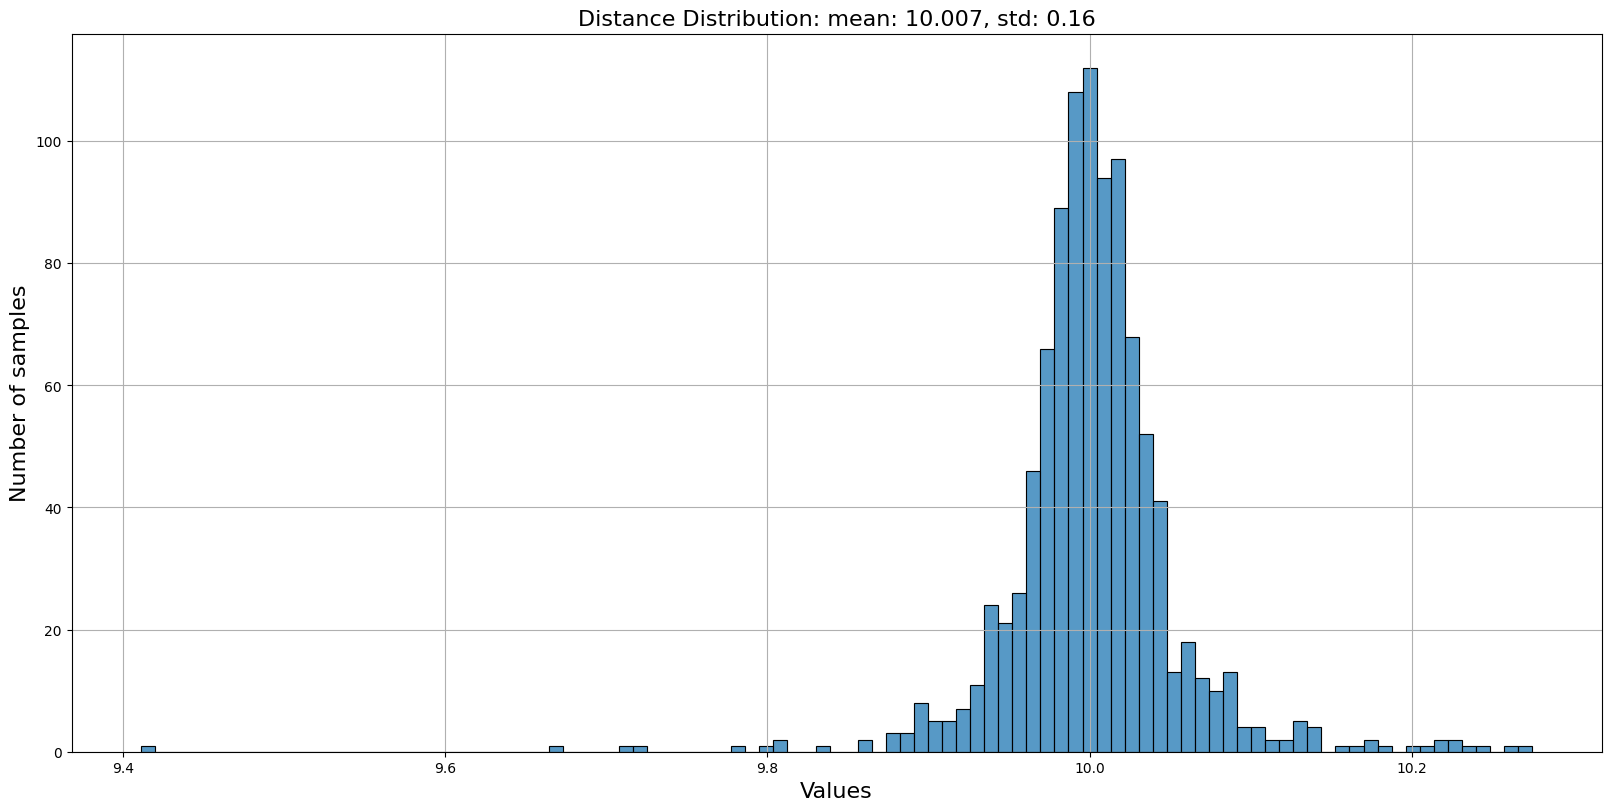

In [7]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

sns.histplot(data=data_plot[(data_plot["avg_distance"]>=exact_value_S-Range_value) & (data_plot["avg_distance"]<=exact_value_S+Range_value)], 
             x="avg_distance", 
             ax=ax)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"Distance Distribution: mean: {round(approximation_S, 3)}, std: {round(np.std(distances_S), 3)}", fontsize=16)
ax.set_xlabel('Values', fontsize=16)
ax.set_ylabel(f"Number of samples", fontsize=16)

plt.show()

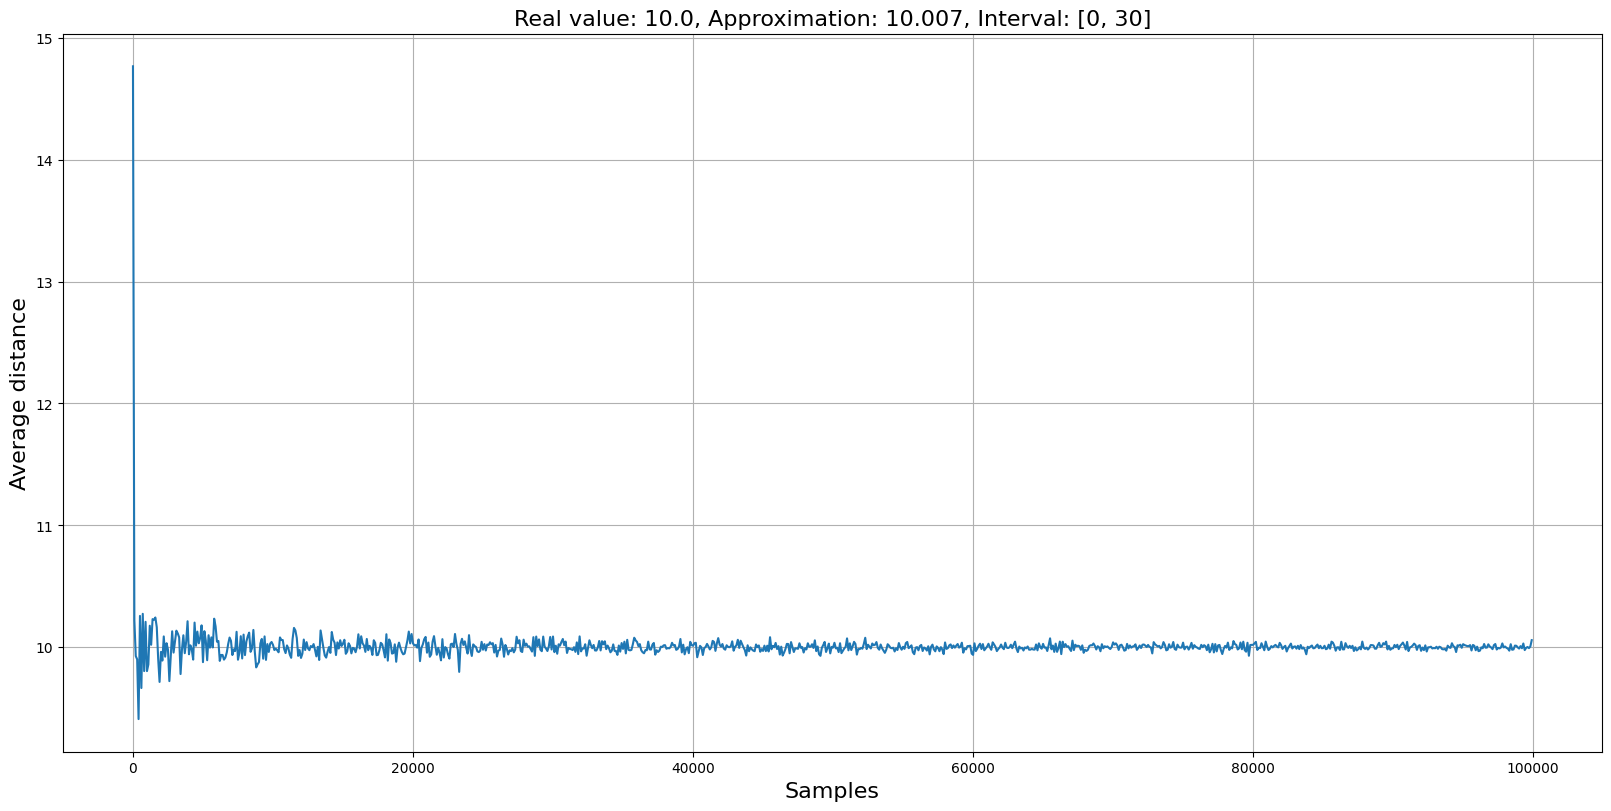

In [8]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

sns.lineplot(x = "samples", 
             y = "avg_distance", 
             data=data_plot, 
             ax=ax)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"Real value: {round(exact_value_S, 3)}, Approximation: {round(approximation_S, 3)}, Interval: [0, {S}]", fontsize=16)
ax.set_xlabel('Samples', fontsize=16)
ax.set_ylabel(f"Average distance", fontsize=16)

plt.show()

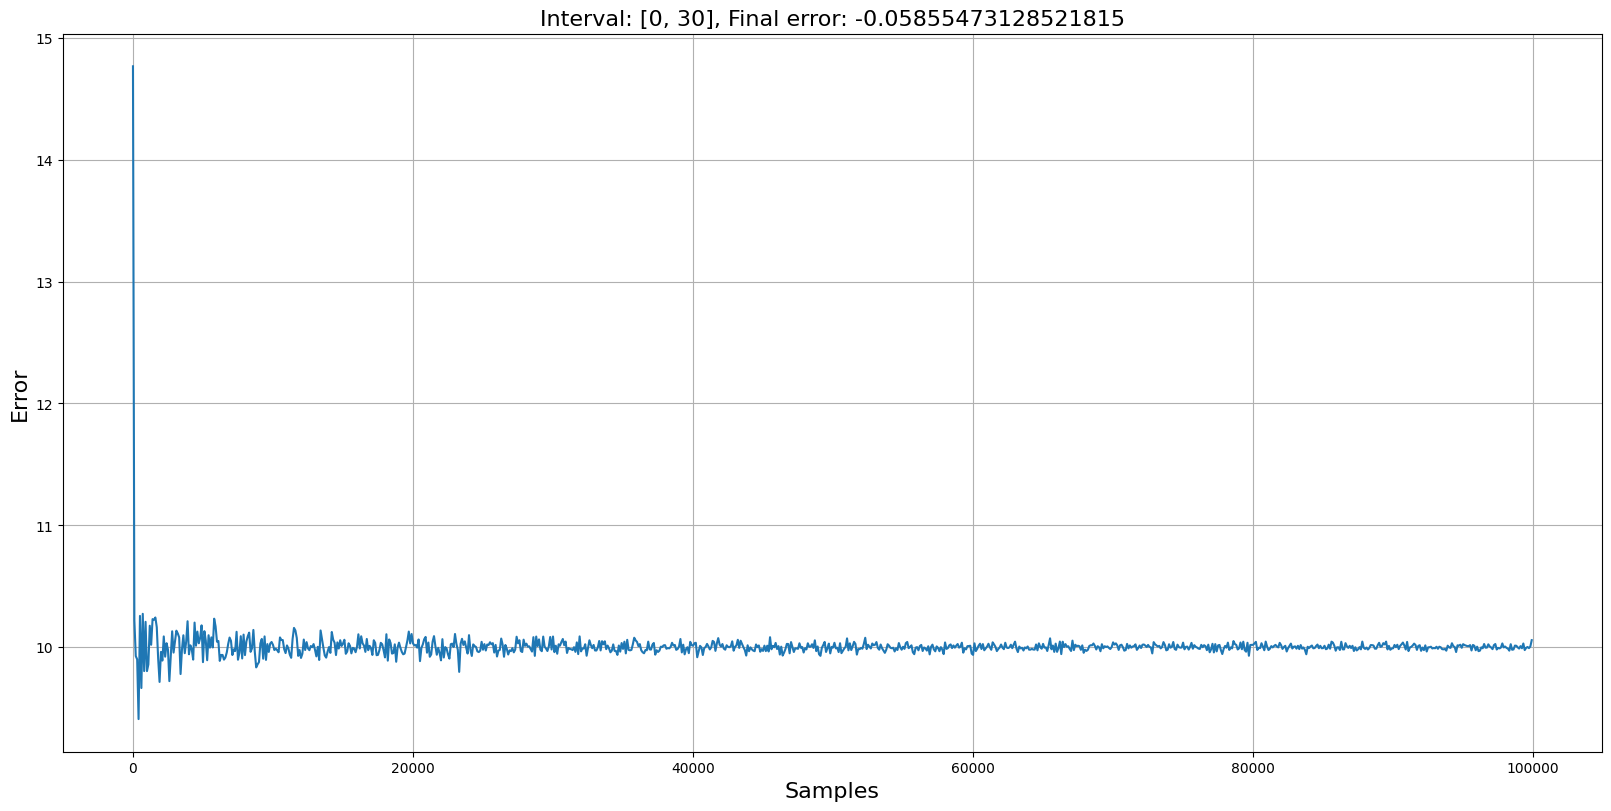

In [9]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

sns.lineplot(x = "samples", 
             y = "avg_distance", 
             data=data_plot, 
             ax=ax)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"Interval: [0, {S}], Final error: {errors_S[-1]}", fontsize=16)
ax.set_xlabel('Samples', fontsize=16)
ax.set_ylabel(f"Error", fontsize=16)

plt.show()

* Show that Problem A is equivalent to computing
 \begin{equation*}
  I = \frac{1}{\pi^2 R^4}\int_{0}^{R}\int_{0}^{R}\int_{0}^{2\pi}\int_{0}^{2\pi}\sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos\phi(\theta_1, \theta_2)}r_1r_2\,d\theta_1\,d\theta_2\,dr_1\,dr_2,
 \end{equation*}
 where $\phi(\theta_1, \theta_2)$ is the central angle between $r_1$ and $r_2$.
 
 __Hint:__ Draw a picture.

__sol__:

From polar coordinates theory, in general any function f(x, y) with area A, we wan calculate the area as follows:

\begin{equation*}
  A = \iint\limits_\mathbb{R} f(x,y)\,dx\,dy
 \end{equation*}

So, we can be rewrite that using polar coordinates as $f(r, \theta)$ using x as p and y as q:

\begin{equation*}
  A = \int_0^{\theta} \int_0^{R} f(r,\theta)||\,r\,dr\,d\theta
 \end{equation*}

So, lets transform to polars:

Let $p = (r_1 \cos(\theta_1), r_1 \sin(\theta_1) )$ and $q = (r_2 \cos(\theta_2), r_2 \sin(\theta_2) )$ where:

$r_1 = \sqrt{p_x^2 + p_y^2}$ and $r_2 = \sqrt{q_x^2 + q_y^2}$

$||p-q|| = \sqrt{(r_1^2 \cos(\theta_1)^2 + r_2^2 \cos(\theta_2)^2 - 2 r_1 r_2 \cos(\theta_1) \cos(\theta_2) ) + (r_1^2 \sin(\theta_1)^2 + r_2^2 \sin(\theta_2)^2 - 2 r_1 r_2 \sin(\theta_1) \sin(\theta_2) )}$

$||p-q|| = \sqrt{r_1^2 + r_2^2 - 2 r_1 r_2 (\cos(\theta_1) \cos(\theta_2) + \sin(\theta_1) \sin(\theta_2) )}$

$||p-q|| = \sqrt{r_1^2 + r_2^2 - 2 r_1 r_2 \cos(\theta_1 - \theta_2) }$

So, remplacing results we have two points in $\mathbb{R}^2$ p and q using euclidean distance: 

\begin{equation}
\iint\limits_\mathbb{R} ||x-y|| \,dx\,dy = \iint \limits_{r_1, \theta_1} \iint \limits_{r_2, \theta_2} \sqrt{r_1^2 + r_2^2 - 2 r_1 r_2 \cos(\theta_1 - \theta_2) } \,r_1\,r_2\,d\theta_1\,d\theta_2\,dr_1\,dr_2,
\end{equation}

Where the factor $r_1 r_2$ comes from the Jacobian.  
Besides, our sampling methods tell us how to calculate the _average_ or expectation as follows: 

\begin{equation}
E[||x-y||] = \frac{\iint\limits_\mathbb{R} ||x-y|| \,dx\,dy}{\text{Total Area}} = \frac{\iint \limits_{r_1, \theta_1} \iint \limits_{r_2, \theta_2} \sqrt{r_1^2 + r_2^2 - 2 r_1 r_2 \cos(\theta_1 - \theta_2) } \,r_1\,r_2\,d\theta_1\,d\theta_2\,dr_1\,dr_2,}{\iint \limits_{r_1, \theta_1} \iint \limits_{r_2, \theta_2} \,dr_1\,dr_2,\,d\theta_1\,d\theta_2}
\end{equation}

Where second term refers all possible points to take, so our final result is:

\begin{equation}
 I = E[||x-y||] = \frac{1}{\pi^2 R^4} \iint \limits_{r_1, \theta_1} \iint \limits_{r_2, \theta_2} \sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos(\theta_1 - \theta_2)} \,r_1\,r_2\,d\theta_1\,d\theta_2 \,dr_1\,dr_2,
\end{equation}

* Compute $I$ in closed-form.  
__Hint:__ Look up _Crofton's mean value theorem_ or _Crofton's formula_. 

__sol__:

We define a function $f(R)$ as the _average distance_ in a disc with radius $R$. From this, we note that $f(R)$ is proportional to $R$ this means that if we __decrease__ the radius $R$, the _average distance_ $f(R)$ also __decrease__.

So, we can define $f(R)=kR$ and if $R=1$ we have $f(1) = k = f'(R)$. In order to find $k$ we need to calculate this term:

\begin{equation}
\lim_{\delta R \to 0} \frac{f(R) - f(R - \delta R)}{\delta R}
\end{equation}

Define as the new distance after apply $f()$ divided by the original distance $\delta R$: scaling factor.

__Note__: We select the expression $f(R) - f(R - \delta R)$ instead of $f(R + \delta R) - f(R)$ because we want to evaluate the internal region (see Fig.)

<img src="images/circle_radius_R.png" height=300 width=300></img>

From Figure, we got 3 different situations: two points inside $\delta R$ evaluated by $f()$, one point inside and one out evaluated by other function $g()$, and two out evaluated by other function $h()$. See Table to summary the idea:

<table>
    <tr>
        <td>
\begin{eqnarray}
            \\
2 in \\
1 in, 1 out\\
2 out
\end{eqnarray}
        </td>
        <td>
\begin{eqnarray}
 \textit{Average distance} \\
f(R - \delta R) \\
g(R, R - \delta R) \\
h(R, R - \delta R) \\
\end{eqnarray}
        </td>
        <td>
\begin{eqnarray}
 \textit{Weight} \\
\alpha \\
\beta \\
\gamma \\
\end{eqnarray}
        </td>
    </tr>
</table>

Using the __Law of total Expectation__ our final is the weighted avergae of $f(R) = \alpha \times f(R - \delta R) + \beta \times g(R - \delta R)  + \gamma \times h(R, R - \delta R)$.

Let's define our probabilities such as: 

\begin{equation}
P(\mathbb{1}\text{ point inside}) = \frac{\text{Area Inner disc }R - \delta R }{\text{Area disc }R} = \frac{\pi  (R - \delta R)^2}{\pi R^2 } = \frac{(R - \delta R)^2}{R^2 } \\
P(\mathbb{1}\text{ point outside}) = 1-\frac{(R - \delta R)^2}{R^2 }
\end{equation}

Since we know that each point is an indenpent event, we evaluate for each case defined in Table we have:

__First case__: Two points inside:
\begin{equation}
P(\mathbb{2}\text{ points inside}) = P(\mathbb{1}\text{ point inside}) \times P(\mathbb{1}\text{ point inside}) \\
P(\mathbb{2}\text{ points inside}) = \frac{(R - \delta R)^2}{R^2 } \times \frac{(R - \delta R)^2}{R^2 } \\
P(\mathbb{2}\text{ points inside}) = \frac{R^4 - 4R^3(\delta R) + 6R^2 (\delta R)^2 - 4R(\delta R)^3 + (\delta R)^4}{R^4 } \\
P(\mathbb{2}\text{ points inside}) \approx 1 - \frac{4\delta R}{R} + o(\delta R)\\
\alpha = 1 - \frac{4\delta R}{R}
\end{equation}

__Second case__: One point inside and one outside:
\begin{equation}
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) = P(\mathbb{1}\text{ point inside}) \times P(\mathbb{1}\text{ point outside})\\
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) = \frac{(R - \delta R)^2}{R^2 } \times (1-\frac{(R - \delta R)^2}{R^2 })\\
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) = (\frac{(R - \delta R)^2}{R^2 } - (\frac{(R - \delta R)^2}{R^2 })^2) \\
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) = 1 - 2 \frac{\delta R}{R} + \frac{(\delta R)^2}{R^2 } - (1 - \frac{4\delta R}{R} + o(\delta R)) \\
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) = 2 \frac{\delta R}{R} + \frac{(\delta R)^2}{R^2} + o(\delta R)) \\
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) \approx \frac{2\delta R}{R} + o(\delta R)
\end{equation}

But this happen twice, so we have:

\begin{equation}
P(\mathbb{1}\text{ point inside and }\mathbb{1}\text{ point outside}) \approx \frac{4\delta R}{R} + o(\delta R)\\
\beta = \frac{4\delta R}{R}
\end{equation}

__Third case__: Two points outside
\begin{equation}
P(\mathbb{2}\text{ points outside}) = P(\mathbb{1}\text{ point outside}) \times P(\mathbb{1}\text{ point outside}) \\
P(\mathbb{2}\text{ points outside}) = (1-\frac{(R - \delta R)^2}{R^2 }) \times (1-\frac{(R - \delta R)^2}{R^2 })\\
P(\mathbb{2}\text{ points outside}) \approx 4\frac{(\delta R)^2}{R^2} + o(\delta R) \approx 0\\
\gamma = 0
\end{equation}

As you note, for powers of $\delta R$ we assume 0, because in our limit ${\delta R \to 0}$.

Finally, we calculate our $f(R)$ (eliminating all o(R)) as:

\begin{equation}
f(R) \approx (1 - \frac{4\delta R}{R}) \times f(R - \delta R) + \frac{4\delta R}{R} \times g(R, R - \delta R) \\
f(R) - f(R - \delta R) \approx -\frac{4\delta R}{R} \times f(R - \delta R) + \frac{4\delta R}{R} \times g(R, R - \delta R) \\
f(R) - f(R - \delta R) \approx \delta R \times \frac{4}{R} (g(R, R - \delta R) - f(R - \delta R) ) \\
\frac{f(R) - f(R - \delta R)}{\delta R} \approx \frac{4}{R} (g(R, R - \delta R) - f(R - \delta R) ) \\
\end{equation}

This expression is similar to our derivate, so doing $\lim_{\delta R \to 0}$ we have:

\begin{equation}
f'(R) = \frac{4}{R} (g(R, R) - f(R))\\
f'(R) = - \frac{4}{R} f(R) + \frac{4}{R} g(R, R)
\end{equation}

This is the _Crofton's differential equation formula_.

Finally, we need to calculate the value of the function $g(R,R)$. Since we define a $g()$ as the distance between one point inside and one outside, when $\delta R \to 0$ the second point $R-\delta R$ goes to the disc contour (edge). This means to calculate the average distance between a random point inside the disc and the edge. 

We can do this calculating the average distance $\rho$ using polar coordinates:

\begin{equation*}
  g(R, R) = \text{Distance of random point inner to the edge} \\
  g(R, R) = \frac{1}{\pi R^2} \int_{-\pi/2}^{\pi/2} \int_0^{2R\cos (\theta)} \rho\,\rho\,d\rho\,d\theta\\
  g(R, R) = \frac{32 R}{9\pi}
 \end{equation*}

Then, replacing in the _Crofton's differential equation formula_:

\begin{equation}
f'(R) = - \frac{4}{R} f(R) + \frac{4}{R} g(R, R) \\
k = - \frac{4}{R} kR + \frac{4}{R} \frac{32R}{9\pi} \\
k = \frac{128}{45\pi} \\
\end{equation}

Finally, we find that:

\begin{equation}
 I = \frac{1}{\pi^2 R^4} \iint \limits_{r_1, \theta_1} \iint \limits_{r_2, \theta_2} \sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos(\theta_1 - \theta_2)} \,r_1\,r_2\,d\theta_1\,d\theta_2 \,dr_1\,dr_2,\\
 I = \frac{128R}{45\pi}
\end{equation}

In [10]:
128*R/(45*np.pi)

9.054147873672267

### Part II -- getting your hands dirty

Now we will move on to implementation.

__Problem B:__

Employ a simulation algorithm to approximate $\textit{I}$ . Provide point and interval estimates and give theoretical guarantees about them (consistency, coverage, etc).

* Represent $I$ as $\int_{\mathcal{X}} \phi(x)\pi(x)\,dx$ and justify your choice of $\phi$, $\pi$ and $\mathcal{X}$.
 Recall that these choices are arbitrary up to a point, but they might lead to wildly different empirical performances __and__ theoretical properties for estimators of $I$.
 
 __Justify__ your choices in light of the method you have been given to work with.
 Choose wisely and be rigorous in your justifications.
 
__sol__:

We start from $I = \int_{\mathcal{X}} f(x)\,dx = \int_{\mathcal{X}} \phi(x)\pi(x)\,dx$ where $\pi$ is the probability density function on $\mathcal{X}$ and:

\begin{equation}
\phi:\, x \to f(x)/\pi(x)
\end{equation}

We need to think about our data:

* We have two points p and q within a circle, e.g. let p = (x,y) with $x^2+y^2 \leq R^2$.
* We want to simulate the _average distance_ between them: $||p-q||$
* We want to construct a good estimator for this experiment.
* We want to use polar coordinates (R,$\theta$) to simulate them, where $R \geq \sqrt{x^2 + y^2}$ and $\theta=\arctan(x/y)$.

From this insights, we need to define the density function of R and $\theta$: 

\begin{equation}
f_{\Theta}(\theta) = \frac{1}{2\pi} \sim \mathcal{U}_{[0,2\pi]}\\
F_{\Theta}(\theta)=P_{\Theta}(\Theta < \theta) = \frac{\theta}{2\pi}\\
\end{equation}

For $\theta$ we can pick any value from $[0,\,2\pi]$ uniformly, in the case of the redius R, we kow that $0<R<\infty$ and they are __independent__.  

Since we know circumference of a disc ir $2\pi r$ and it grows linearly with $r$, let's say $f(r) = C r$ should be a probability density. Then, integrating $f(r)$ over the interval $[0,R]$ we have $F(r) = 1 = \frac{C}{2} R^2$. Just replacing and we get that $C = 2/R^2$. So: 

\begin{equation}
f_{R}(r) = 2\frac{r}{R^2}\\
F_R (r) = P_R(R < r) = \frac{r^2}{R^2}
\end{equation}

In order to simulate them, let's apply the inverse transformation for each, taking $u  \sim \mathcal{U}_{[0,1]}$:

\begin{equation}
F^{-1}_{\Theta}(u) = 2\pi u \sim \mathcal{U}_{[0,2\pi]}\\
F^{-1}_{R}(u) = R \sqrt{u}  \sim \mathcal{U}_{[0,R]}
\end{equation}

So, let's construct a joined pdf $\pi(r, \theta) = f_{R, \Theta} (r, \theta) = f_{R}(r) f_{\Theta}(\theta)$ we have:

\begin{equation}
\pi(r, \theta) = \frac{2r}{R^2} \frac{1}{2\pi} \\
\pi(r, \theta) = \frac{r}{\pi R^2}\\
\end{equation}

So, for the two points $p=(r_1 \cos(\theta_1), r_1\sin(\theta_1))$ and $q=(r_2 \cos(\theta_2), r_2\sin(\theta_2))$ we have

\begin{equation}
\pi(x_p, y_p) = \frac{1}{\pi R^2} r_1\\
\pi(x_q, y_q) = \frac{1}{\pi R^2} r_2
\end{equation}

So, the points $p$ and $q$ can be chosen independently each one, we have:

\begin{equation}
P(||p-q||) = \pi(x_p, y_p) \times \pi(x_q, y_q) \\
P(||p-q||) = \frac{1}{\pi R^2} r_1 \times \frac{1}{\pi R^2} r_2 \\
P(||p-q||) = \frac{1}{\pi^2 R^4} r_1 r_2 \\
\end{equation}

In summary, we have our $f$, $\phi$, and $\pi$ evaluated in our points $p$ and $q$ in polar coordinates:

\begin{equation}
f(p, q) = \frac{1}{\pi^2 R^4} \sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos(\theta_1 - \theta_2)} r_1 r_2 \\
\pi(p, q) =  \frac{1}{\pi^2 R^4} r_1 r_2\\
\phi(p, q) = \frac{f(p,q)}{\pi(p,q)}\\
\phi(p, q) = \sqrt{r_1^2 + r_2^2 - 2r_1r_2\cos(\theta_1 - \theta_2)} 
\end{equation}

Finally, in order to simulate each point $\mathcal{X}_1, \mathcal{X}_2, \dots, \mathcal{X_n}$, each $\mathcal{X}_i = (r_i\cos(\theta_i), r_i\sin(\theta_i)))$ where $r_i\in [0, R]$ and $\theta_i \in [0, 2\pi]$.

We will use the _uniform distribution_ as follows:

* For each sample $\mathcal{X}_i$ we define two numbers $u_1, u_2 \sim \mathcal{U}_{[0,1]}$
* Assign values to $r_i=R\sqrt{u_1}$ and $\theta_i=2\pi u_2$
* We have $r_i \sim \mathcal{U}_{[0,R]}$ and $\theta_i \sim \mathcal{U}_{[0,2\pi]}$
* $\mathcal{X}_i = (r_i \cos(\theta_i), r_i\sin(\theta_i) )$

__MonteCarlo__ example:

In [11]:
def polar_distance(r_1, theta_1, r_2, theta_2):
    return np.sqrt( r_1**2 + r_2**2 - 2*r_1*r_2*np.cos(theta_1 - theta_2) ) 

In [12]:
def polar_coordinates(n, R):
    theta_1 = 2*np.pi* np.random.uniform(low=0, high=1, size=n)
    r_1 = R* np.sqrt(np.random.uniform(low=0, high=1, size=n))
    
    theta_2 = 2*np.pi* np.random.uniform(low=0, high=1, size=n)
    r_2 = R* np.sqrt(np.random.uniform(low=0, high=1, size=n))
    
    return r_1, theta_1, r_2, theta_2

In [13]:
def sample_polar(n, R):
    theta_1 = 2*np.pi* np.random.uniform(low=0, high=1, size=n)
    r_1 = R* np.sqrt(np.random.uniform(low=0, high=1, size=n))
    
    return np.vstack((r_1*np.cos(theta_1), r_1*np.sin(theta_1))).T

In [14]:
distances_MC = []
errors_MC = []
exact_value_R = 128*R/(45*np.pi)
X_MC = []
Y_MC = []

for n in range(1, N, 100):
    
    r_1, theta_1, r_2, theta_2 = polar_coordinates(n, R)
    
    distance = np.mean(polar_distance(r_1, theta_1, r_2, theta_2))
    X_MC.append(r_1*np.cos(theta_1))
    Y_MC.append(r_1*np.sin(theta_1))
    
    distances_MC.append(distance)
    errors_MC.append(exact_value_R - distance)
    
approximation_MC = np.mean(distances_MC)
approximation_MC

9.049445578953408

In [15]:
data_points = pd.DataFrame({"x": X_MC[-1], "y": Y_MC[-1]})

(-15.0, 15.0)

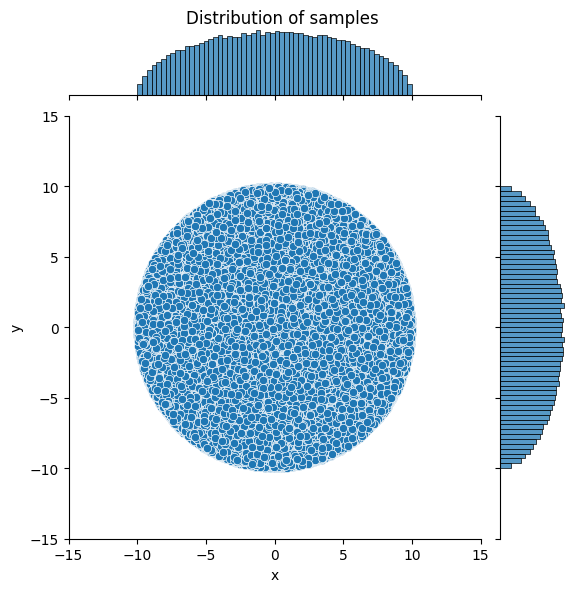

In [16]:
sns_fig = sns.jointplot(data=data_points, 
                        x="x", 
                        y="y",
#                        kind='hex'
                       )

sns_fig.fig.suptitle("Distribution of samples")

sns_fig.fig.tight_layout()
sns_fig.fig.subplots_adjust(top=0.95) # Reduce plot to make room

sns_fig.ax_marg_x.set_xlim(-1.5*R, 1.5*R)
sns_fig.ax_marg_y.set_ylim(-1.5*R, 1.5*R)

# sns_fig.fig.set_figwidth(8)
# sns_fig.fig.set_figheight(16)

In [17]:
data_plot = pd.DataFrame({"samples": range(1, N, 100), "avg_distance": distances_MC})

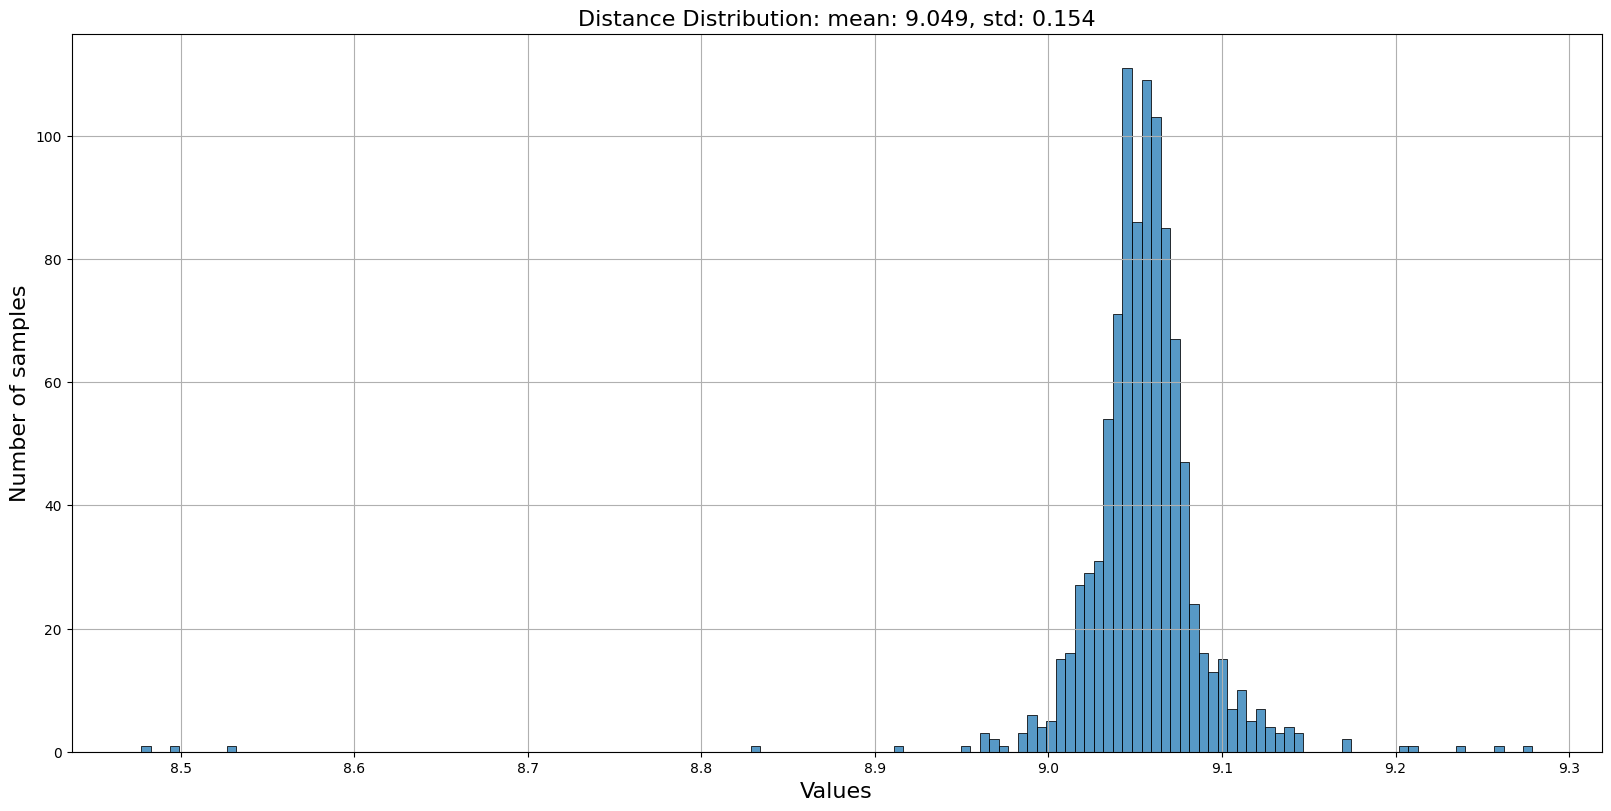

In [18]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

sns.histplot(data=data_plot[(data_plot["avg_distance"]>=exact_value_R-Range_value) & (data_plot["avg_distance"]<=exact_value_R+Range_value)],  
            x="avg_distance",
            ax=ax )

# sns_fig = sns.displot(data=data_plot[(data_plot["avg_distance"]>=exact_value_R-Range_value) & (data_plot["avg_distance"]<=exact_value_R+Range_value)],  
#                       x="avg_distance",
#                       kde=True)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"Distance Distribution: mean: {round(approximation_MC, 3)}, std: {round(np.std(distances_MC), 3)}", fontsize=16)
ax.set_xlabel('Values', fontsize=16)
ax.set_ylabel(f"Number of samples", fontsize=16)

plt.show()

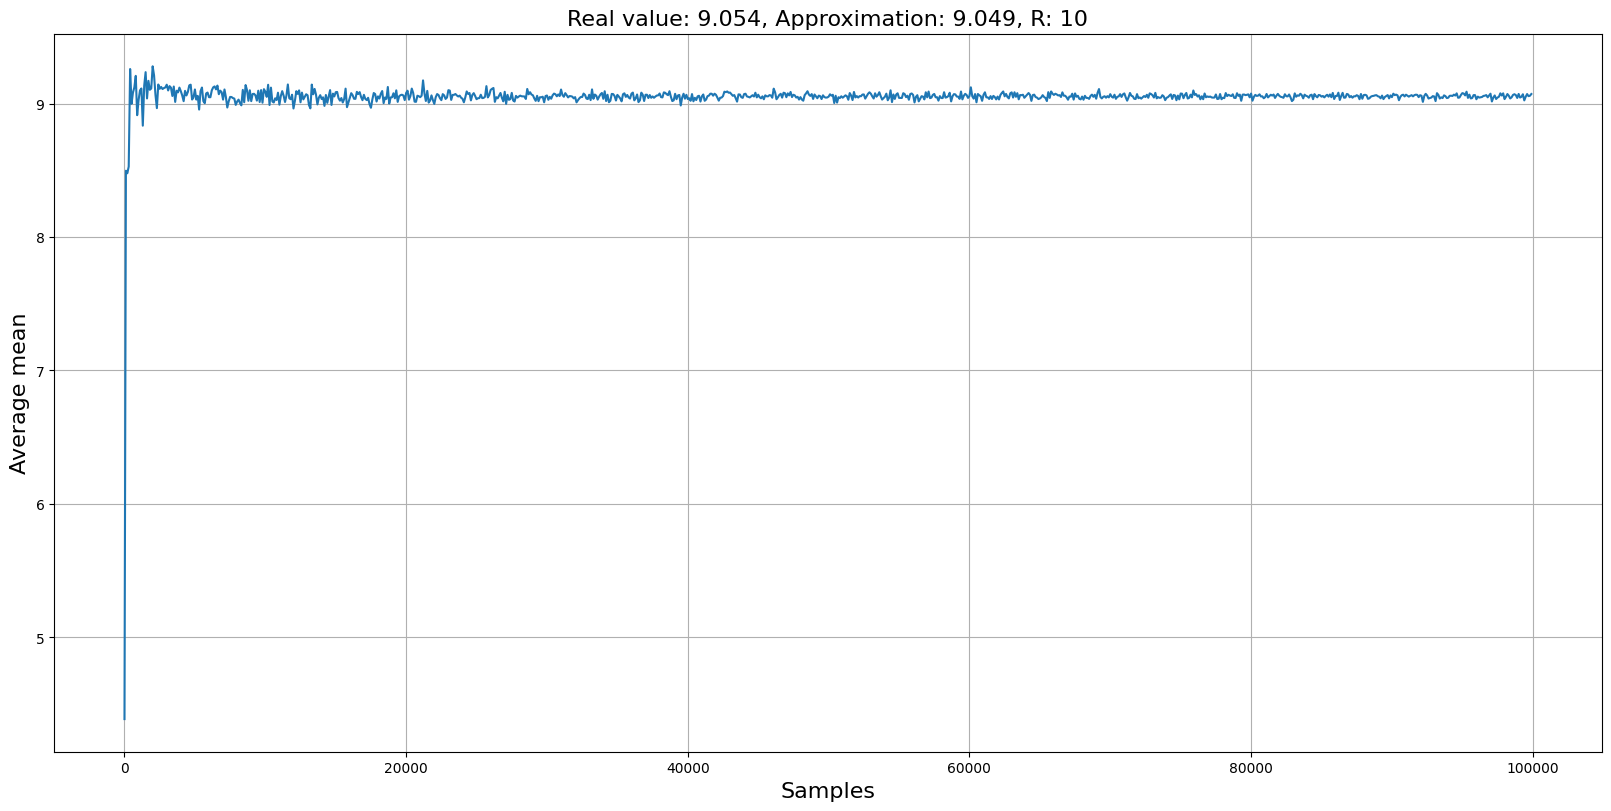

In [19]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

sns.lineplot(x = "samples", 
             y = "avg_distance", 
             data=data_plot, 
             ax=ax)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"Real value: {round(exact_value_R, 3)}, Approximation: {round(approximation_MC, 3)}, R: {R}", fontsize=16)
ax.set_xlabel('Samples', fontsize=16)
ax.set_ylabel(f"Average mean", fontsize=16)

plt.show()

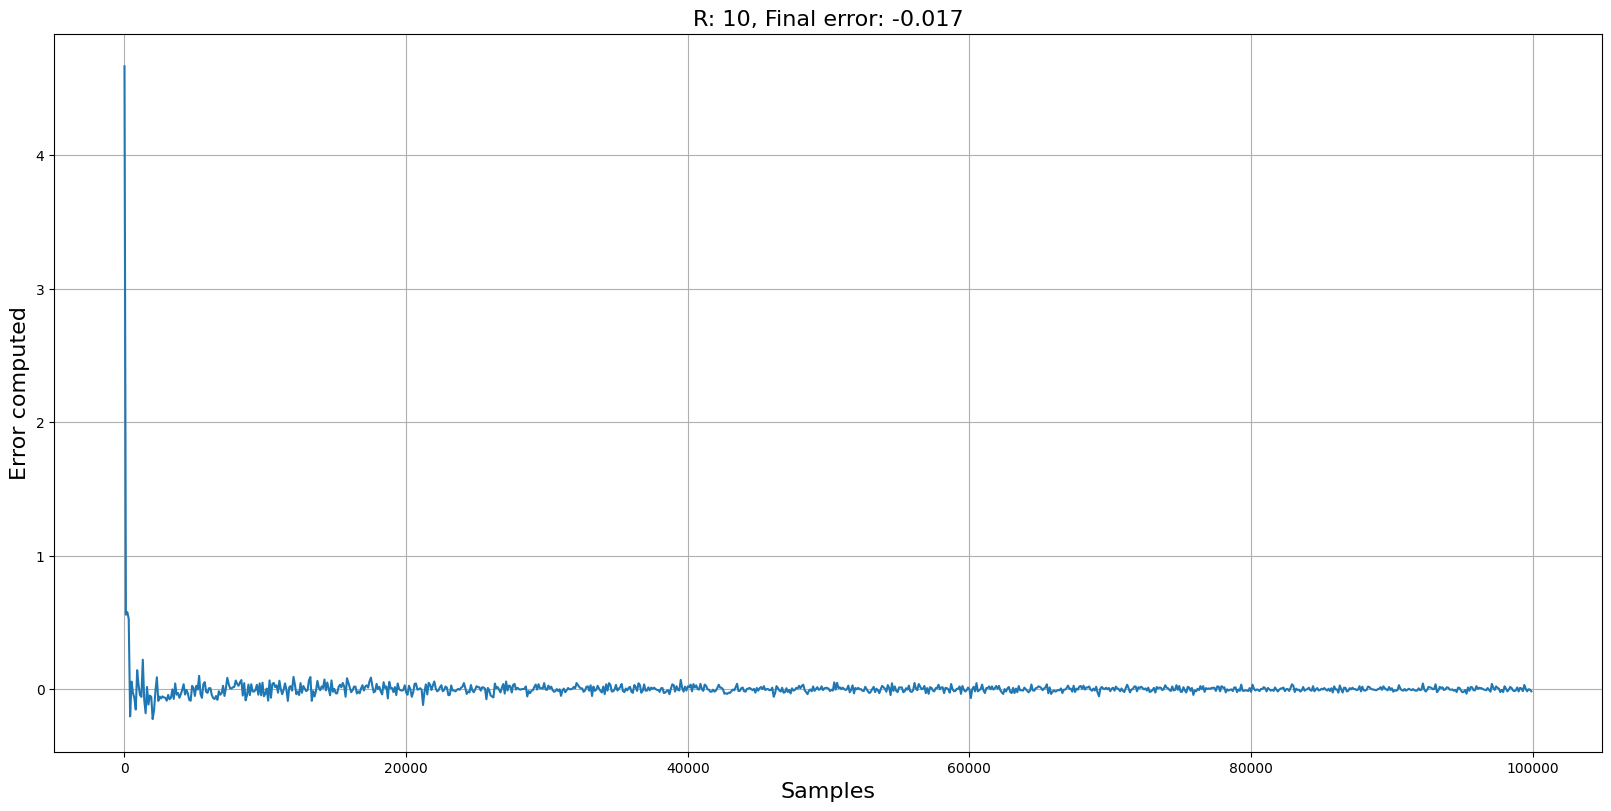

In [20]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

data_plot = pd.DataFrame({"samples": range(1, N, 100), "avg_distance": errors_MC})

sns.lineplot(x = "samples", 
             y = "avg_distance", 
             data=data_plot, 
             ax=ax)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"R: {R}, Final error: {round(errors_MC[-1], 3)}", fontsize=16)
ax.set_xlabel('Samples', fontsize=16)
ax.set_ylabel(f"Error computed", fontsize=16)

plt.show()

* Again, starting from the eventual samples you will obtain with your method, construct a non-empty family of estimators of $I$ and discuss whether it is (strongly) consistent and whether a central limit theorem can be established.

__sol__:

We want to estimate $\phi$ by __Gibbs Sampling__. So, in order to sample using Gibbs, we need to sample from a conditional distribution than to marginalize by integrating over a joint distribution.

Suppose we want to obtain $k$ samples of $\mathbf {X} =(x_{1},\dots ,x_{n})$ from a joint distribution $p(x_{1},\dots ,x_{n})$. 

Denote the i-th sample by $\mathbf {X} ^{(i)}=\left(x_{1}^{(i)},\dots ,x_{n}^{(i)}\right)$. We proceed as follows:

* We begin with some initial value $\mathbf {X} ^{(0)}$.

* We want the next sample $\mathbf {X} ^{(i+1)}=\left(x_{1}^{(i+1)},x_{2}^{(i+1)},\dots ,x_{n}^{(i+1)}\right)$ which is a vector, we sample each component of the vector, $x_{j}^{(i+1)}$, from the distribution of that component conditioned on all other components sampled so far.  
  But there is a catch: we condition $\mathbf {X} ^{(i+1)}$s components up to $x_{j-1}^{(i+1)}$, and thereafter condition on $\mathbf {X} ^{(i)}$, starting from $x_{j+1}^{(i)}$ to $x_{n}^{i}$.  
  To achieve this, we sample the components in order, starting from the first component.   
  More formally, to sample $x_{j+1}^{(i)}$, we update it according to the distribution specified by $p(x_{j}^{(i+1)}|x_{1}^{(i+1)},\dots ,x_{j-1}^{(i+1)},x_{j+1}^{(i)},\dots ,x_{n}^{(i)})$.  
  We have to evaluate that the $(j+1)$th component had the $i$th sample, not the $(i+1)$ sample.
  
* Repeat the above step $k$ times.

Since we are working in 2-dimensional vectors, we will have each $x_i$ depending on $r_i \sim \mathcal{U}_{[0,R]}$ and $\theta_i \sim \mathcal{U}_{[0,2\pi]}$. So we need to generate our first point $x=(r_i\cos(\theta_i), r_i\sin(\theta_i))=(x_1^0, x_2^0)$. We define our join probability $p(x_1^0, x_2^0)$ and proceed to calculate next iterations:

\begin{equation}
x_1^1 \sim p(x_1 | x_2^0)\\
x_2^1 \sim p(x_2 | x_1^1)\\
\dots \\
x_m^k \sim p(x_m | x_{m=1,2}^{k-1})\\
\end{equation}

In general, in 2-D case we have:

\begin{equation}
p(x_1|x_2) \sim \mathcal{N}(\mu_0 + \frac{\Sigma_{01}}{\Sigma_{11}}(x_1 - \mu_1) ,\, \Sigma_{00} - \frac{\Sigma_{01}^2}{\Sigma_{11}})\\
p(x_2|x_1) \sim \mathcal{N}(\mu_1 + \frac{\Sigma_{01}}{\Sigma_{00}}(x_0 - \mu_0) ,\, \Sigma_{11} - \frac{\Sigma_{01}^2}{\Sigma_{00}})
\end{equation}

In [21]:

# Define the posterior for the mean, conditional on the covariance matrix and data
def mult_normal_dist(data, cov):
    return np.random.multivariate_normal(mean = (np.mean(data, axis=0)), cov =cov/np.size(data, 0))

# Define the posterior for the covariance matrix, conditional on the mean and data
def inv_wishart_dist(data, mean): 
    return invwishart.rvs(df = np.size(data, 0), scale = np.matmul(np.transpose((data - mean)),(data - mean)))




In general, we will generate a distribution using a 2-D Gaussian to generate points, first qe calculate the mean $\mu$, variances, and $cov$ of our "original" distribution:

\begin{equation}
P \sim \mathcal{N}(\mu, \Sigma)\\
\mu = \begin{bmatrix}
\mu_0 \\
\mu_1
\end{bmatrix}\\
\Sigma = \begin{bmatrix}
\Sigma_{00} & \Sigma_{01} \\
\Sigma_{10} & \Sigma_{11}
\end{bmatrix}
\end{equation}

In [22]:
def gibbs_sampler(R, num_iterations, data, create_gif=False):
    
    # Starting point, random point inside circle
    mean = sample_polar(1, R)[0]
    cov = np.cov(data.T)
    # How many iterations to sample
    frames = []  # for GIF
    
    means = list()
    covs = list()
    stds = list()
    cov_l = list()
    means.append(mean)
    
    samples = np.zeros([num_iterations+1, 2]) # sampled points
    samples[0] += mean
    tmp_points = np.zeros([num_iterations, 2]) # inbetween points
    
    # Iteratively sample
    for i in range(0,num_iterations):
        tmp_points[i] += np.random.multivariate_normal(mean, cov, size=1)[0]
        if(create_gif):
            frames.append(plot_samples(samples, i+1, tmp_points, i+1, mean, cov, title="Num Samples: " + str(i)))
        # Sample the variance conditional on the previous mean and data
        cov = inv_wishart_dist(data, mean)
        covs.append(cov)
        stds.append([cov[0,0], cov[1,1]])
        cov_l.append(cov[1,0])
        
        # Sample the mean conditional on the previous mean and data
        mean = mult_normal_dist(data, cov)
        means.append(mean)
        
        # new point
        samples[i+1] += np.random.multivariate_normal(mean, cov, size=1)[0]
        if(create_gif):
            frames.append(plot_samples(samples, i+2, tmp_points, i+1, mean, cov, title="Num Samples: " + str(i+1)))
    
    return np.array(means), covs, np.array(stds), cov_l, frames

We need to generate each initial point $x_{i}^{(0)}=(r_i\cos(\theta_i), r_i\sin(\theta_i))$, from them we take the mean $\mu$ and the variance to generate a Normal distribution.

In addition, we need to calculate estimated mean and variance from our expected data. 

In [23]:
original_dist = sample_polar(N, R)
original_mean = np.mean(original_dist, axis=0)
original_cov = np.cov(original_dist.T)

print("True mean: ", np.around(original_mean, decimals=5), "\nTrue CoV:\n", np.around(original_cov, decimals=5))

True mean:  [-0.01294 -0.0202 ] 
True CoV:
 [[24.98043 -0.11021]
 [-0.11021 24.91393]]


(-15.0, 15.0)

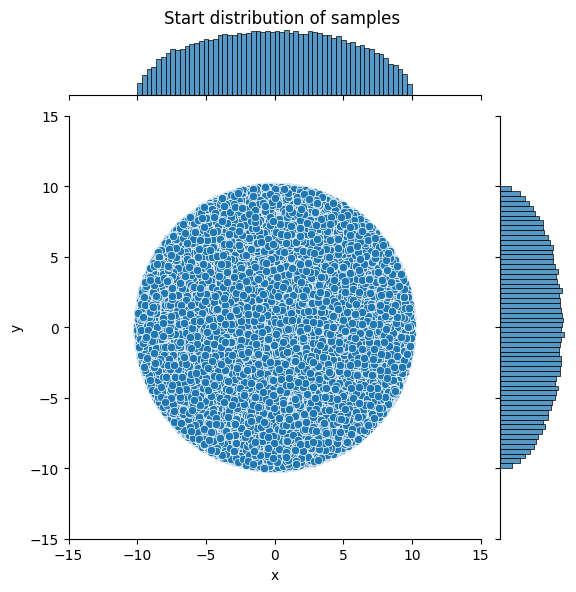

In [24]:
data_points = pd.DataFrame({"x": original_dist[:,0], "y": original_dist[:,1]})

sns_fig = sns.jointplot(data=data_points, 
                        x="x", 
                        y="y",
#                        kind='hex'
                       )

sns_fig.fig.suptitle("Start distribution of samples")

sns_fig.fig.tight_layout()
sns_fig.fig.subplots_adjust(top=0.95) # Reduce plot to make room

sns_fig.ax_marg_x.set_xlim(-1.5*R, 1.5*R)
sns_fig.ax_marg_y.set_ylim(-1.5*R, 1.5*R)

# sns_fig.fig.set_figwidth(8)
# sns_fig.fig.set_figheight(16)

In [25]:
means, covs, stds, cov_l, frames = gibbs_sampler(R, N, original_dist, create_gif=False)

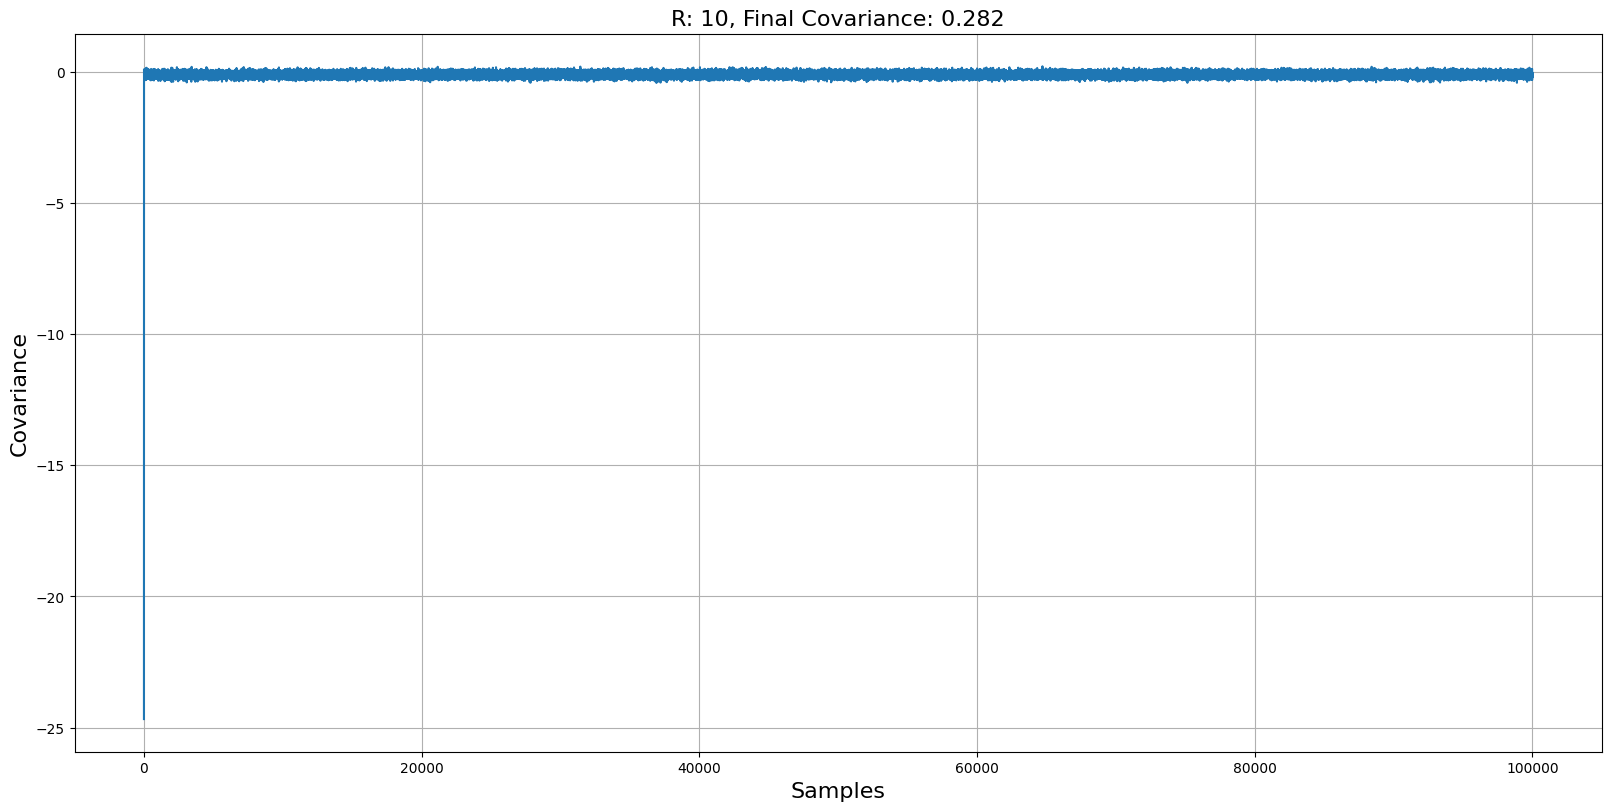

In [26]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

data_plot = pd.DataFrame({"samples": range(0, N), "covariance": cov_l})

sns.lineplot(x = "samples", 
             y = "covariance", 
             data=data_plot, 
             ax=ax)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"R: {R}, Final Covariance: {abs(round(cov_l[-1], 3))}", fontsize=16)
ax.set_xlabel('Samples', fontsize=16)
ax.set_ylabel(f"Covariance", fontsize=16)

# ax.set_ylim(-1, 1)
# sns_fig.ax_marg_y.set_ylim(-1.5*R, 1.5*R)

plt.show()

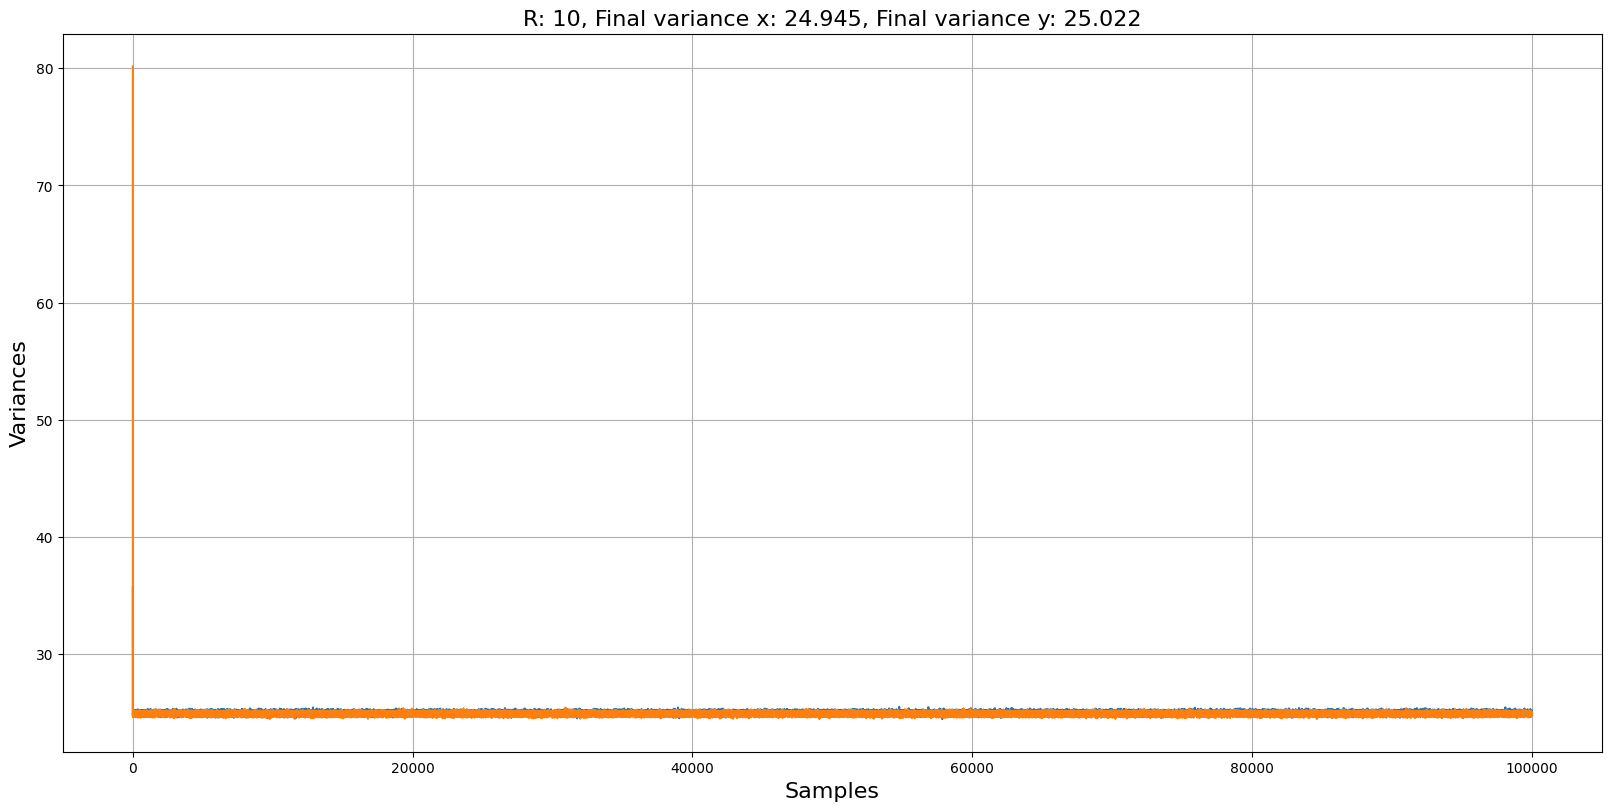

In [27]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

data_plot = pd.DataFrame({"samples": range(0, N), "variance_x": stds[:,0], "variance_y": stds[:,1]})

sns.lineplot(x = "samples", 
             y = "variance_x", 
             data=data_plot, 
             ax=ax)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"R: {R}, Final variance x: {abs(round(stds[:,0][-1], 3))}, Final variance y: {abs(round(stds[:,1][-1], 3))}", fontsize=16)
ax.set_xlabel('Samples', fontsize=16)
ax.set_ylabel(f"Variances", fontsize=16)

sns.lineplot(x = "samples", 
             y = "variance_y", 
             data=data_plot, 
             ax=ax)

# ax.set_ylim(25, 23)
# sns_fig.ax_marg_y.set_ylim(-1.5*R, 1.5*R)

plt.show()

Let's see our new sampler:

In [28]:
samples = np.random.multivariate_normal(means[-1], covs[-1], size=N)

In [29]:
sample_mean = np.mean(samples, axis=0)
sample_cov = np.cov(samples.T)

print("True mean: ", np.around(original_mean, decimals=5), "\nTrue CoV:\n", np.around(original_cov, decimals=5))
print("Estimated mean: ", np.around(sample_mean, decimals=5), "\nEstimated CoV:\n", np.around(sample_cov, decimals=5))

True mean:  [-0.01294 -0.0202 ] 
True CoV:
 [[24.98043 -0.11021]
 [-0.11021 24.91393]]
Estimated mean:  [ 0.00744 -0.01065] 
Estimated CoV:
 [[25.13685 -0.34158]
 [-0.34158 25.15501]]


* Detail a suite of diagnostics that might be employed in your application to detect convergence or performance problems.
 Extra points for those who design algorithms that exploit the structure of this particular integration problem. 

__sol__:

We show our new data sample. We saw that we obtained samples greater than the radius $R=10$, but the distribution of them is close to zero.

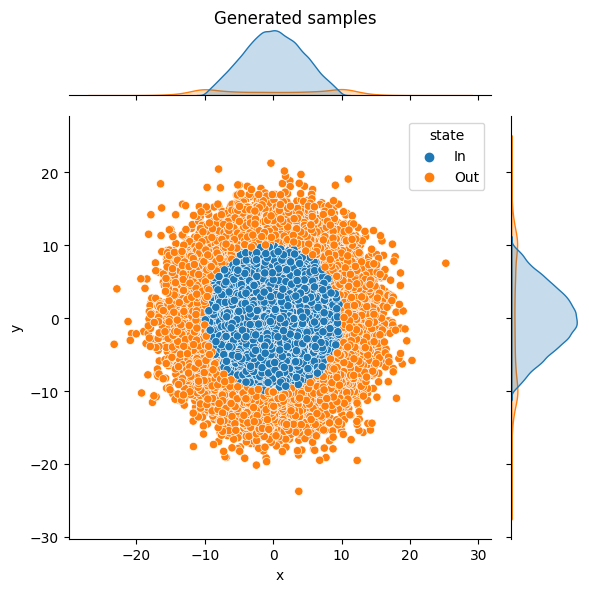

In [30]:
data_points = pd.DataFrame({"x": samples[:,0], "y": samples[:,1]})
data_points["state"] = data_points.apply(lambda row: "Out" if row["x"]**2 + row["y"]**2>100 else "In", axis=1)

pal = sns.color_palette(n_colors=2)

sns_fig = sns.jointplot(data=data_points, 
                        x="x", 
                        y="y",
                        hue='state', 
                        hue_order=['In', 'Out'], 
                        palette=pal,
                       )

sns_fig.fig.suptitle("Generated samples")
sns_fig.fig.tight_layout()
sns_fig.fig.subplots_adjust(top=0.95) # Reduce plot to make room

# sns_fig.ax_marg_x.set_xlim(-1.5*R, 1.5*R)
# sns_fig.ax_marg_y.set_ylim(-1.5*R, 1.5*R)

# sns_fig.fig.set_figwidth(8)
# sns_fig.fig.set_figheight(16)

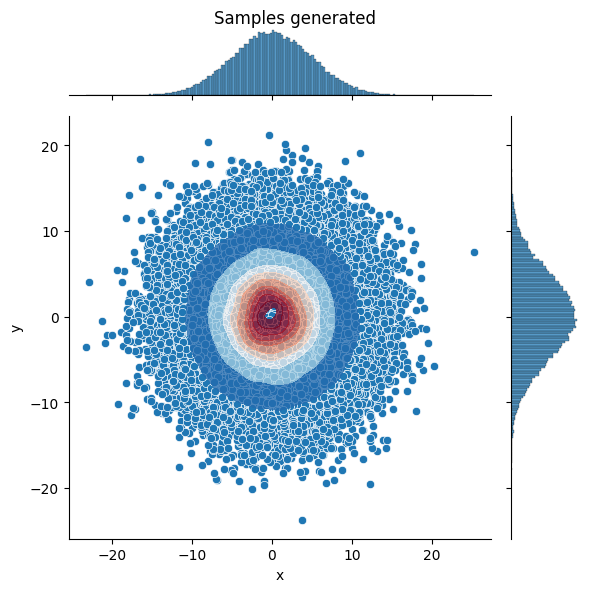

In [31]:
data_points = pd.DataFrame({"x": samples[:,0], "y": samples[:,1]})

sns_fig = sns.jointplot(data=data_points, 
                        x="x", 
                        y="y",
#                         kind='kde'
                       )

# for estado, color in zip(['In', 'Out'], pal):
#     sns.regplot(data=data_points[data_points['state'] == estado], 
#                 x='x', 
#                 y='y', 
#                 color=color, 
#                 truncate=False, 
#                 ax=sns_fig.ax_joint)

# we select CI: [0.8, 0.85, 0.9, 0.95, 0.99]
sns_fig.plot_joint(sns.kdeplot, cmap="RdBu_r", alpha=0.75, levels = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.99], fill=True)
#sns_fig.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

sns_fig.fig.suptitle("Samples generated")
sns_fig.fig.tight_layout()
sns_fig.fig.subplots_adjust(top=0.95) # Reduce plot to make room

# sns_fig.ax_marg_x.set_xlim(-1.5*R, 1.5*R)
# sns_fig.ax_marg_y.set_ylim(-1.5*R, 1.5*R)

# sns_fig.fig.set_figwidth(8)
# sns_fig.fig.set_figheight(16)

Let's see the __average distance__ calculated by our __gibbs sampler__:

In [32]:
distances_Gibbs = []
errors_Gibbs = []
exact_value_R = 128*R/(45*np.pi)
X_Gibbs = []
Y_Gibbs = []

for n in range(1, N, 100):
    
    x_1 = np.random.multivariate_normal(sample_mean, sample_cov, size=n)
    x_2 = np.random.multivariate_normal(sample_mean, sample_cov, size=n)
    
    distance = np.mean(np.linalg.norm(x_1 - x_2, axis=1))
    X_Gibbs.append(x_1)
    Y_Gibbs.append(x_2)
    
    distances_Gibbs.append(distance)
    errors_Gibbs.append(exact_value_R - distance)
    
approximation_Gibbs = np.mean(distances_Gibbs)
approximation_Gibbs

8.897217358158036

Now, Let's calculate the CI for this data:

Confidence Interval 95\%: in order to calculate this CI we need to apply:

* Let $m$ the average of samples.
* Let $N$ number of samples.
* Let $s$ the standard deviation of samples.

So, we have:

\begin{equation}
CI = (m-t_c\frac{s}{\sqrt{N}}, m+t_c\frac{s}{\sqrt{N}})
\end{equation}

where $t_c$ is the Student- distribution approximated (based on the CLT). This value is calculate as follows for any confidence $c$:

\begin{equation}
t_c = | I_{N-1}(\frac{1-c}{2}) |
\end{equation}

* $I_{N-1}$ is the Student's inverse distribution.

In [33]:
confidence = 0.95

In [34]:
t_crit = np.abs(t.ppf((1-confidence)/2, len(samples)-1))
t_crit

1.9599877077718446

In [35]:
margin = t_crit*np.std(samples)/np.sqrt(len(samples))

In [36]:
lowerinterval = approximation_Gibbs - margin
upperinterval = approximation_Gibbs + margin

(lowerinterval, upperinterval)

(8.866137020825409, 8.928297695490663)

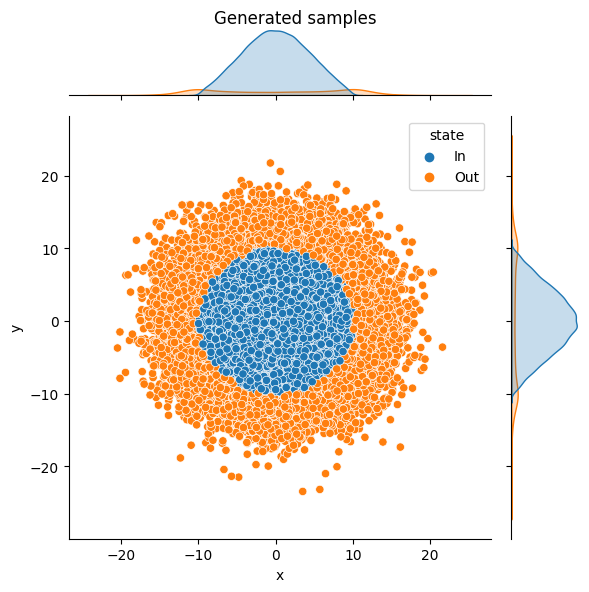

In [37]:
data_points = pd.DataFrame({"x": X_Gibbs[-1][:,0], "y": X_Gibbs[-1][:,1]})
data_points["state"] = data_points.apply(lambda row: "Out" if row["x"]**2 + row["y"]**2>100 else "In", axis=1)

pal = sns.color_palette(n_colors=2)

sns_fig = sns.jointplot(data=data_points, 
                        x="x", 
                        y="y",
                        hue='state', 
                        hue_order=['In', 'Out'], 
                        palette=pal,
                       )

sns_fig.fig.suptitle("Generated samples")
sns_fig.fig.tight_layout()
sns_fig.fig.subplots_adjust(top=0.95) # Reduce plot to make room

# sns_fig.ax_marg_x.set_xlim(-1.5*R, 1.5*R)
# sns_fig.ax_marg_y.set_ylim(-1.5*R, 1.5*R)

# sns_fig.fig.set_figwidth(8)
# sns_fig.fig.set_figheight(16)

In [38]:
data_plot = pd.DataFrame({"samples": range(1, N, 100), "avg_distance": distances_Gibbs})

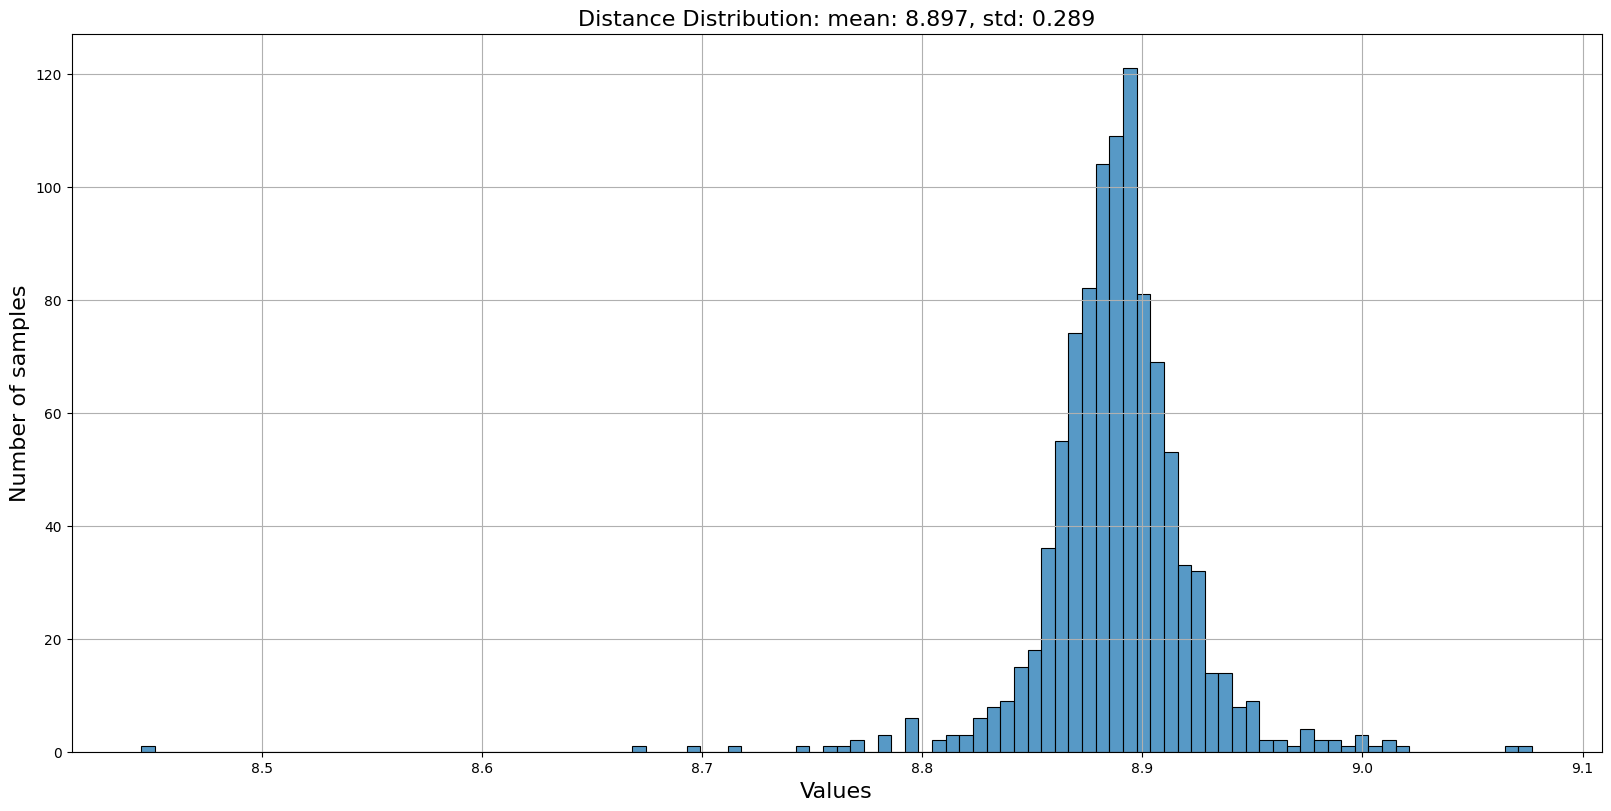

In [39]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

sns.histplot(data=data_plot[(data_plot["avg_distance"]>=exact_value_R-Range_value) & (data_plot["avg_distance"]<=exact_value_R+Range_value)],  
            x="avg_distance",
            ax=ax )

# sns_fig = sns.displot(data=data_plot[(data_plot["avg_distance"]>=exact_value_R-Range_value) & (data_plot["avg_distance"]<=exact_value_R+Range_value)],  
#                       x="avg_distance",
#                       kde=True)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"Distance Distribution: mean: {round(approximation_Gibbs, 3)}, std: {round(np.std(distances_Gibbs), 3)}", fontsize=16)
ax.set_xlabel('Values', fontsize=16)
ax.set_ylabel(f"Number of samples", fontsize=16)

plt.show()

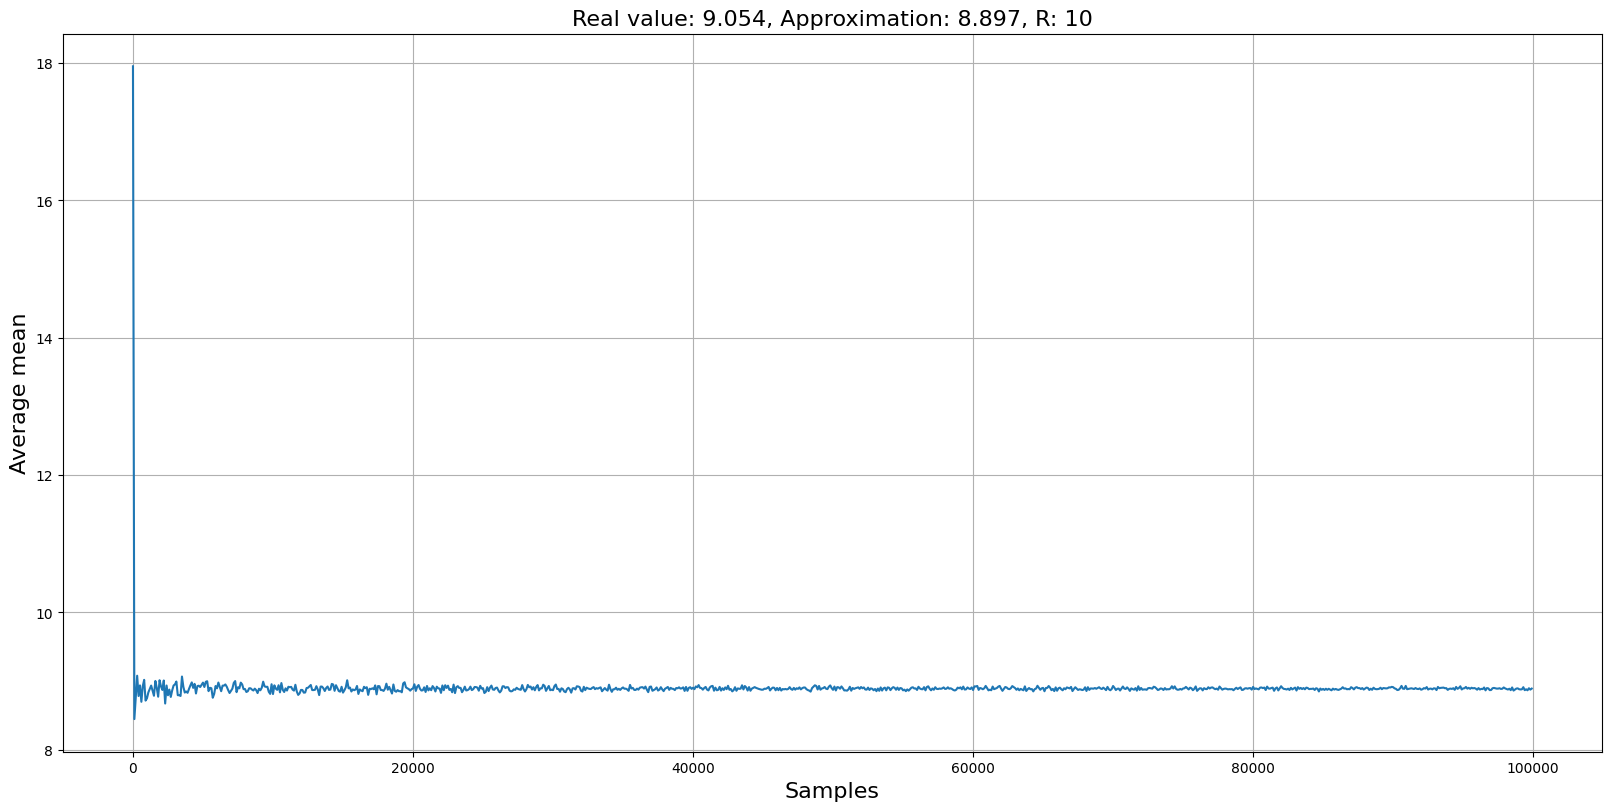

In [40]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

sns.lineplot(x = "samples", 
             y = "avg_distance", 
             data=data_plot, 
             ax=ax)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"Real value: {round(exact_value_R, 3)}, Approximation: {round(approximation_Gibbs, 3)}, R: {R}", fontsize=16)
ax.set_xlabel('Samples', fontsize=16)
ax.set_ylabel(f"Average mean", fontsize=16)

plt.show()

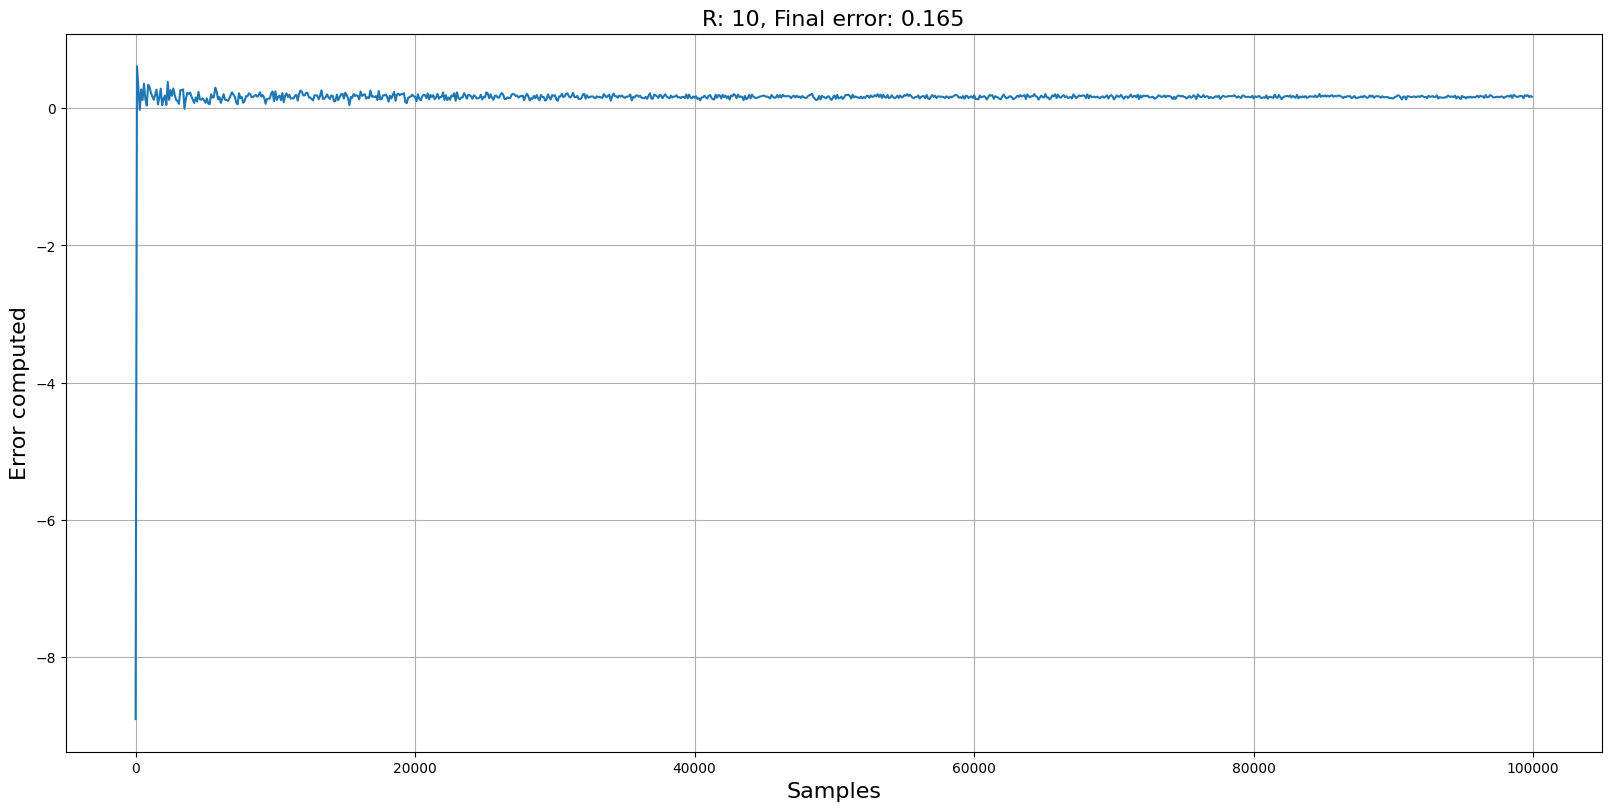

In [41]:
_, ax = plt.subplots(figsize=(16,8),sharex=True, sharey=False, constrained_layout=True)

data_plot = pd.DataFrame({"samples": range(1, N, 100), "avg_distance": errors_Gibbs})

sns.lineplot(x = "samples", 
             y = "avg_distance", 
             data=data_plot, 
             ax=ax)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_title(f"R: {R}, Final error: {round(errors_Gibbs[-1], 3)}", fontsize=16)
ax.set_xlabel('Samples', fontsize=16)
ax.set_ylabel(f"Error computed", fontsize=16)

plt.show()

__We note that our gibbs sampler works fine__, a little noise generated by the values far from the original disk with radius $R$ (but it doesn´t impact too much).

* For each $R \in \{0.01, 0.1, 1, 10, 100, 1000, 10000\}$, perform $M=500$ runs from your simulation method and compute: (i) variance (ii) bias (iii) standard deviation of the mean (MCSE).

__sol__:

In [42]:
R_list = [0.01, 0.1, 1, 10, 100, 1000, 10000]
M = 500
N = 10000

for current_R in R_list:
    mean_list = []
    cov_list = []
    var_list = []
    mcse_list = []
    bias_list = []
    for _ in range(M): # 500 runs for each case
        current_dist = sample_polar(N, current_R) # generating N samples
        current_mean = np.mean(current_dist, axis=0)
        current_cov = np.cov(current_dist.T)

        # N numbers sampling with gibbs
        means, covs, varis, cov_l, frames = gibbs_sampler(current_R, N, current_dist, create_gif=False)
        mean_list.append(means[-1])
        cov_list.append(cov_l[-1])
        var_list.append(varis[-1])
        
        current_samples = np.random.multivariate_normal(means[-1], covs[-1], size=N)
        # calculating RMSE
        mse = mean_squared_error(current_dist, current_samples)
        mcse_list.append(mse)
        
        bias = np.mean(current_dist - current_samples)
        bias_list.append(bias)

        if _==0:
            print("#############################################################")
            print("Current R:", current_R)
            print("True mean: ", np.around(current_mean, decimals=5), "\nTrue CoV:\n", np.around(current_cov, decimals=5))
            print("Estimated mean: ", np.around(means[-1], decimals=5), "\nEstimated CoV:\n", np.around(covs[-1], decimals=5))

    print("Variance:", np.around(np.mean(np.array(var_list), axis=0), 3))
    print("means:", np.around(np.mean(np.array(mean_list), axis=0), 3))
    print("MCSE:", np.around(np.mean(mcse_list), 3))
    print("Bias:", np.around(np.mean(bias_list), 3))

#############################################################
Current R: 0.01
True mean:  [-2.e-05  1.e-05] 
True CoV:
 [[2.e-05 0.e+00]
 [0.e+00 3.e-05]]
Estimated mean:  [3.e-05 4.e-05] 
Estimated CoV:
 [[2.e-05 0.e+00]
 [0.e+00 3.e-05]]
Variance: [0. 0.]
means: [0. 0.]
MCSE: 0.0
Bias: 0.0
#############################################################
Current R: 0.1
True mean:  [0.00068 0.00044] 
True CoV:
 [[ 2.49e-03 -4.00e-05]
 [-4.00e-05  2.51e-03]]
Estimated mean:  [0.00023 0.00077] 
Estimated CoV:
 [[ 2.50e-03 -4.00e-05]
 [-4.00e-05  2.52e-03]]
Variance: [0.003 0.002]
means: [ 0. -0.]
MCSE: 0.005
Bias: 0.0
#############################################################
Current R: 1
True mean:  [-0.00104 -0.0023 ] 
True CoV:
 [[ 2.4812e-01 -2.2000e-04]
 [-2.2000e-04  2.4961e-01]]
Estimated mean:  [-0.00986 -0.00132] 
Estimated CoV:
 [[ 0.25052 -0.00078]
 [-0.00078  0.25179]]
Variance: [0.25 0.25]
means: [-0.  0.]
MCSE: 0.5
Bias: 0.0
#################################################

* Can you identify one key quantity missing from the previous item?  
 _Hint:_ it bears relevance to the real world application of any computational method.
estimator.

__sol__:

I gues some diagnostic of convergence methods such as __burn-in__. 

From results, we saw that for a very large radius value the error and bias increase. 

In the other hand, radius lower than $100$ tends to be more easy to find an estimator.

Finally, we saw the __bias-variance trade-off__, this means that we can achieve a low bias but in contrast we got a high variance which increase the mse also.

__Final Notes__: In order to change the variables from polar to cartesian coordinates, we just need to apply the jacobian rule: $\hat{\pi}(x, y) = \pi(r, \theta) |det \frac{\partial (r, \theta)}{\partial (x, y)}|$

Using the one point, we have: $p=(x,y) = ( r\cos(\theta), r\sin(\theta) )$ and $(r,\theta) = ( \sqrt{x^2 + y^2}, \arctan(x/y) )$. Where:

\begin{equation}
|det \frac{\partial (r, \theta)}{\partial (x, y)}| = \begin{vmatrix}
    \cos(\theta) & -r\sin(\theta) \\
    \sin(\theta)    & r\cos(\theta)
\end{vmatrix} \\
|det \frac{\partial (r, \theta)}{\partial (x, y)}| = r
\end{equation}

Finally, for the point $p=(x, y)$ we obtain $\pi(x, y)$:

\begin{equation}
\hat{\pi}(x, y) =  |det \frac{\partial (r, \theta)}{\partial (x, y)}| \pi(r, \theta) \\
\hat{\pi}(x, y) = r \pi(r, \theta) = \frac{1}{\pi R^2} r^2\\
\hat{\pi}(x, y) = \frac{x^2 + y^2}{\pi R^2}
\end{equation}